In [504]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt

In [505]:
a, b, N = -4.0, 4.0, 400

C = 1/2
h_bar = 1
m = 1

dx = (b-a)/N

x = np.arange(a+dx, b, dx)

# a + (b - a)*i/N = x_i
# i = 1,2,3,4

H = np.zeros((N-1, N-1))

In [506]:
for i1 in range(1, N): # 1 -> N-1 i1 - i
    for i2 in range(1, N): # 1 -> N-1 i2 - i'
        
        # if i1-1 != i2-1:
        #     H[i1-1][i2-1] = (h_bar**2 / 2 * m)*(1/(dx**2))*((-1) ** (i1 - i2))*(2/((i1 - i2)**2))
        # if i1-1 == i2-1:
        #     H[i1-1][i2-1] = (h_bar**2 / 2 * m)*(1/(dx**2))*((-1) ** (i1 - i2))*((np.pi**2)/3) + C * (x[i1-1] ** 2)
        
        if i1-1 != i2-1:
            H[i1-1][i2-1] = (
                (h_bar**2 / (2 * m))
                * ((-1) ** (i1 - i2) / ((b - a) ** 2))
                * (np.pi**2 / 2)
                * (
                    1 / ((np.sin(np.pi * (i1 - i2) / (2 * N))) ** 2)
                    - 1 / ((np.sin(np.pi * (i1 + i2) / (2 * N))) ** 2)
                )
            )
        if i1-1 == i2-1:
            
            H[i1-1][i2-1] = (h_bar**2 / 2 * m) * (1 / (b - a) ** 2) * (np.pi**2 / 2) * (
                (2 * N**2 + 1) / 3 - (1 / ((np.sin(np.pi * i1 / N)) ** 2))
            ) + C * (x[i1-1] ** 2)
            # 

In [507]:
# k = 1.0
# V0 = 10.0

# for i1 in range(1, N): # 1 -> N-1 i1 - i
#     for i2 in range(1, N): # 1 -> N-1 i2 - i'
        
#         if i1-1 != i2-1:
#             H[i1-1][i2-1] = (h_bar**2 / 2 * m)*(1/(dx**2))*((-1) ** (i1 - i2))*(2/((i1 - i2)**2))
#         if i1-1 == i2-1:
#             if np.abs(x[i1-1]) > k:
#                 V = V0
#             else:
#                 V = 0
            
#             H[i1-1][i2-1] = (h_bar**2 / 2 * m)*(1/(dx**2))*((-1) ** (i1 - i2))*((np.pi**2)/3) + V
        
        # if i1-1 != i2-1:
        #     H[i1-1][i2-1] = (
        #         (h_bar**2 / (2 * m))
        #         * ((-1) ** (i1 - i2) / ((b - a) ** 2))
        #         * (np.pi**2 / 2)
        #         * (
        #             1 / ((np.sin(np.pi * (i1 - i2) / (2 * N))) ** 2)
        #             - 1 / ((np.sin(np.pi * (i1 + i2) / (2 * N))) ** 2)
        #         )
        #     )
        # if i1-1 == i2-1:
        #     if np.abs(x[i1-1]) > k:
        #         V = V0
        #     else:
        #         V = 0
            
        #     H[i1-1][i2-1] = (h_bar**2 / 2 * m) * (1 / (b - a) ** 2) * (np.pi**2 / 2) * (
        #         (2 * N**2 + 1) / 3 - (1 / ((np.sin(np.pi * i1 / N)) ** 2))
        #     ) + V
            # + C * (x[i1-1] ** 2)

In [508]:
H

array([[ 3.49525537e+03, -2.22222222e+03,  4.68750000e+02, ...,
         7.13592209e-06, -4.75679230e-06,  2.37824944e-06],
       [-2.22222222e+03,  3.96392597e+03, -2.40000000e+03, ...,
        -1.42727248e-05,  9.51417153e-06, -4.75679230e-06],
       [ 4.68750000e+02, -2.40000000e+03,  4.05065252e+03, ...,
         2.14112888e-05, -1.42727248e-05,  7.13592209e-06],
       ...,
       [ 7.13592209e-06, -1.42727248e-05,  2.14112888e-05, ...,
         4.05065252e+03, -2.40000000e+03,  4.68750000e+02],
       [-4.75679230e-06,  9.51417153e-06, -1.42727248e-05, ...,
        -2.40000000e+03,  3.96392597e+03, -2.22222222e+03],
       [ 2.37824944e-06, -4.75679230e-06,  7.13592209e-06, ...,
         4.68750000e+02, -2.22222222e+03,  3.49525537e+03]])

In [509]:
eigenvalues, eigenvectors = np.linalg.eig(H)

In [510]:
eigenvalues.min()

0.5000004908566025

In [511]:
eigenvectors = eigenvectors.T
eigenvectors = eigenvectors / np.sqrt(((dx*np.abs(eigenvectors)**2).sum(axis=1)))

In [512]:
(dx * np.abs(eigenvectors)**2).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [513]:
indexes = eigenvalues.argsort()

/tmp/ipykernel_11252/2043485378.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))


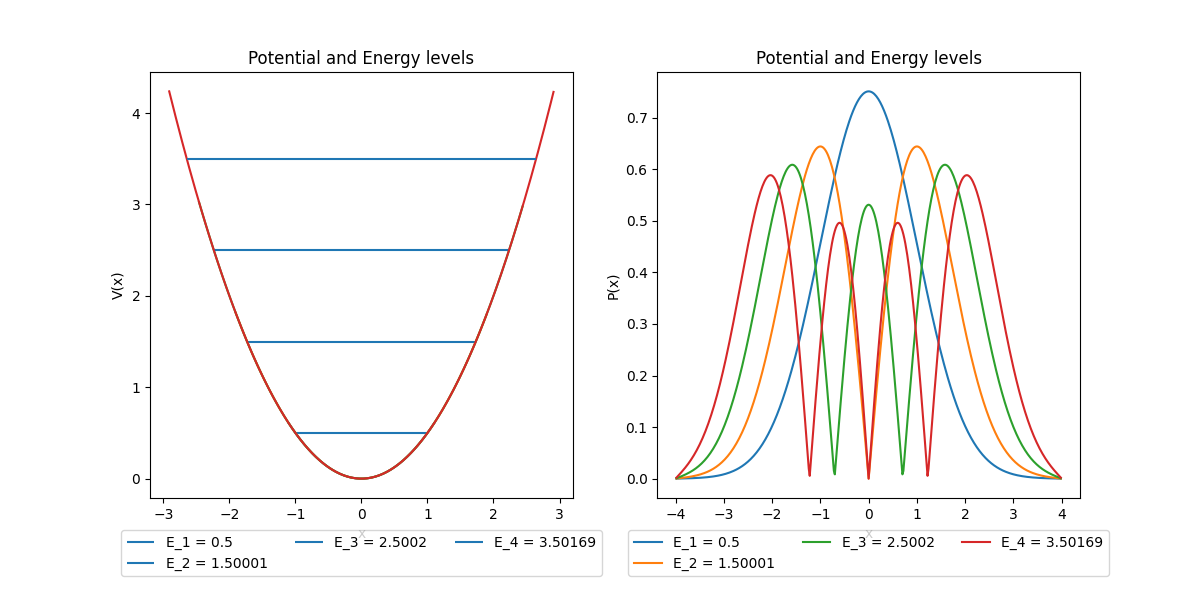

In [514]:
plt.close()
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(4):
    
    x_cut = np.sqrt(eigenvalues[indexes[i]]/C)
    x_new = np.arange(-x_cut.max()*1.1, x_cut.max()*1.1, dx)
    ax[0].plot(x_new, C*x_new**2)
    ax[0].hlines(eigenvalues[indexes[i]], -x_cut, x_cut, label=f"E_{i+1} = {eigenvalues[indexes[i]]:.6g}")
    ax[0].legend(bbox_to_anchor=(0.5, -0.2), loc="lower center", ncol=3)
    ax[0].set_title("Potential and Energy levels")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("V(x)")
    ax[1].plot(x, np.abs(eigenvectors[indexes[i]]), label=f"E_{i+1} = {eigenvalues[indexes[i]]:.6g}")
    ax[1].legend(bbox_to_anchor=(0.5, -0.2), loc="lower center", ncol=3)
    ax[1].set_title("Potential and Energy levels")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("P(x)")
    
fig.subplots_adjust(
    bottom=0.17,
)

/tmp/ipykernel_11252/950133191.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))


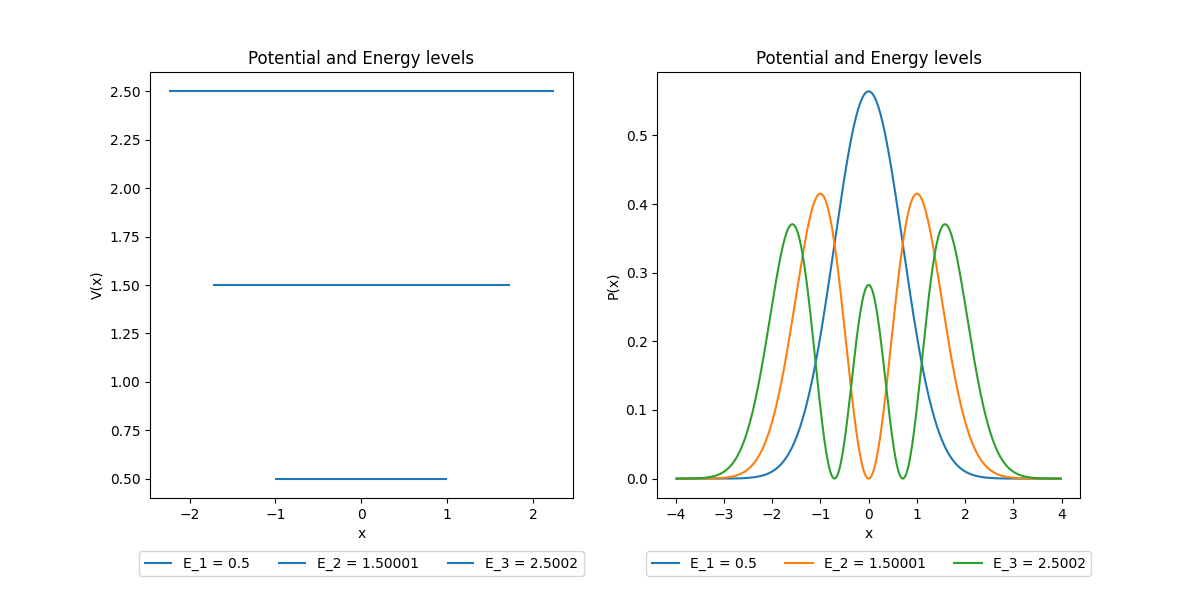

In [515]:
from math import e


plt.close()
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i in range(3):
    
    x_cut = np.sqrt(eigenvalues[indexes[i]]/C)
    x_new = np.arange(-x_cut.max()*1.1, x_cut.max()*1.1, dx)
    ax[0].hlines(eigenvalues[indexes[i]], -x_cut, x_cut, label=f"E_{i+1} = {eigenvalues[indexes[i]]:.6g}")
    ax[0].legend(bbox_to_anchor=(0.5, -0.2), loc="lower center", ncol=3)
    ax[0].set_title("Potential and Energy levels")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("V(x)")
    ax[1].plot(x, np.abs(eigenvectors[indexes[i]])**2, label=f"E_{i+1} = {eigenvalues[indexes[i]]:.6g}")
    ax[1].legend(bbox_to_anchor=(0.5, -0.2), loc="lower center", ncol=3)
    ax[1].set_title("Potential and Energy levels")
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("P(x)")
fig.subplots_adjust(
    bottom=0.17,
)

In [ ]:
# plt.close()
# fig, ax = plt.subplots(1, 1, figsize=(12, 6))
# for i in range(29, 30):
#     ax.vlines([-k, k], 0, V0)
#     ax.hlines(V0, -k, a)
#     ax.hlines(V0, k, b)
#     ax.legend(bbox_to_anchor=(0.5, -0.2), loc="lower center", ncol=3)
#     ax.set_title("Potential and Energy levels")
#     ax.set_xlabel("x")
#     ax.set_ylabel("V(x) and P(x) * constant")
#     prob = np.abs(eigenvectors[indexes[i]])**2
#     ax.plot(x, (V0/prob.max())*prob, label=f"E_{i+1} = {eigenvalues[indexes[i]]:.6g}")
#     ax.legend(bbox_to_anchor=(0.5, -0.2), loc="lower center", ncol=3)
#     ax.set_title("Potential, Energy levels and wave functions")

# fig.subplots_adjust(
#     bottom=0.17,
# )

No such comm: 460390b5daa449dbbdee20a1999bc169
